In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

# 3B: Scope probes
> <font color='blue'>Learning goal:</font> Understand when scope probes are used,when it is better to use coax cables and what do you need to remember when using the probes
Structure of an experiment:
- Anticipate + Stimulate (10+30+25 min): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (40 min): with your partner(group of 2)
- Compare + Conclude (10 min): with a group of 4(per table)

## BACKGROUND
> <font color='grey'>⏳ Estimated time: 10 min</font>

In this assignment you will explore why and when scope probes are beneficial, and you'll explore how to optimally set them. 

In an ideal world a wire does not have any resistance, capacitance or inducatance. However, in a real world a wire will have an often negligible resistance. A coax cable will have a capacitance, which will influence the frequqency dependent behavior. The solution, up to certain extend, is to use a scope probe, which is a smart combination of (again) a wire, with resistances and capacitors. 


A schematic of a voltage divider - coax cable - scope, and one with an additional scope probe, is as follows:
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS3_probe_with_compensation.jpg" width=50%></img>

It is up to you to find out how the scope probe works, and how to optimally use it. When you carefully examine the probe (to be found on top of your scope), you might notice a yellow screw hole by which you could do adapt one of the internal capacitors to compensate for the variation in the other capacitance values. Have a look at the schematic below, and have a look at the influence of non-optimal capacitance setting on the measurement of a block wave.


<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS3_probe_overshoot.JPG" width=50%></img>


<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS3_probe_compensation_scheme.JPG" width=50%></img>

Once measuring a sine wave, you might not notice the nonideal compensation. When measuring a block wave, you will encounter undershoot or overshoot for a non-ideally set capacitance. This is something to avoid!

## ANTICIPATE: the functioning of a scope probe vs coax cables
> <font color='grey'>⏳ Estimated time: 30 min</font>

1) Have a look at the above circuit (simulating a coax cable and scope probe measurement with a scope). What are the qualitative (not yet numerical) differences between measuring with a coax cable versus a scope in terms of:
* max value of Vout in the Fourier spectrum?
* cutoff frequency in the Fourier spectrum?

2) If you replace bottom resistor (R2&R6 in the voltage divider) with a 30 nF capcitor, would you still need to measure with a scope probe?(consider only the "bottom" part of the circuit)

3) Now it is time for two quantitative derivations:
* Derive, above/below which frequency, it is beneficial to use the probe. (Hint: check the RC time!)
* Derive the optimal value for the compensation capacitor $C_S$ Feel free to watch the following movie about scope probes: https://www.youtube.com/watch?v=LId6gJi6S_s

In [ ]:
### TO DO="your predictions"


## SIMULATE 1: a probe vs coax behaviour 
> <font color='grey'>⏳ Estimated time: 15 min</font>

* Implement the schematic in LTSpice
* replace {Cs} by 25 pF for now, later in this assignment you will vary that value
* use .ac dec 100 10 100Meg as your simulation settings (AC analysis, decade sweep)
* set Vin to (in advanced options) sine, with amplitude 1, frequency 1k, Ncycles 10 and ACAmplitude to 1; if you are unsure how to do it, look at 3A SIMULATE 2
* plot the voltage out versus frequency, for both measurement configurations(probe, coax cable)
* find and compare the two -3dB points (look at the frequency spectrum) and discuss 
    * when it is better to use a coax cable
    * when it is better to use a scope probe
    > __<font color='blue'>Hint:</font>__
The -3dB points you find should differ by a factor of ~10. You can multiple Vout and Vout2 by a certain factor (such that Vout/Vin = 1) to have them start at 0dB; alternatively, you can just look for the point where the graph has dropped by 3dB. What do these points mean for your measurements at high/low frequencies?
* add a screenshot showing the spectrum of Vout and Vout2.  
* for easy finding the -3 dB point you might want to plot a scaled version of Vout and Vout2, such that the intensity is at 0 dB at the start 

For a quick visual introduction, feel free to watch the following movie
    

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('QtNJ8El-XVE', width = 600, height = 450)


In [ ]:
from ipywidgets import FileUpload
from IPython.display import Image
import os
upload=FileUpload()
upload



In [ ]:
file_name="3B_1_Vprobe.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

In [ ]:
### TO DO='your answer for the -3 dB points (at which frequencies)'



> <font color='red'>**Optional challenge**</font>

> * predict qualitatively (and verify with simulations) what happens to the -3dB point, when you lower the resistors in the voltage divider to 100kOhm? <br>
Will it shift to lower or higher frequency, or stay the same?

> * When Vin is a blockwave, how would Vout look like? 
> * Would it be possible to derive the -3dB point from a single Vout in a time graph?
> * Explain why so or why not.
> * Verify it with simulations.
> __<font color='blue'>Hint:</font>__ Create a short pulse (1ms) and use a transient simulation setting 

In [ ]:
### TO DO="your answer(optional)"


## SIMULATE 2: probe compensation
> <font color='grey'>⏳ Estimated time: 10 min</font>

The probe also has an additional capacitor, for compensation. In the simulation you did it was chosen to be 25 pF, but it can vary between 7 and 50 pF.
* Compare the spectra of C4 (Ccompensation) for  7 pF, 25 pF, 50 pF.
* Set your simulation settings to .tran 0 5m 0 1u (transient analysis); it is easier to see changes in output in voltage vs time plot that in voltage vs frequency. **remember to comment or delete previous simulation settings**
* Compare the Vout2 in time for a 500 Hz square signal( *you need to **change your Vin** to PULSE where Von=1, Ton=10m, Tperiod=20m, Ncycles=10, ACAmplitude=1*), for C4 (Ccompensation) = 7 pF, 25 pF, 50 pF.
* Discuss which is the best value.

> __<font color='blue'>Hint:</font>__
> The use of variables is optional but it is very helpful. Use the following approach:
> * change the value of C4 into {Cvar}, with Cvar being a variable
> * add a spice directive, saying for example .step param Cvar 5p 50p 5p; it means that your parameter Cvar will change by adding a step value, here: 5p- starting value, 50p- end value, 5p- step value; click on *.op* to write spice directive
> <img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/72f7c30357b9caa07cefd5a8c79735c2e179be67/LTS/LTS4_topmenu_LTSpice-125.jpg" width=40%></img>
> * Of course feel free to manually change the value of the capacitor instead of using param

Feel free to watch the following movie on how to use a variable Cs or Cvar in LTSpice


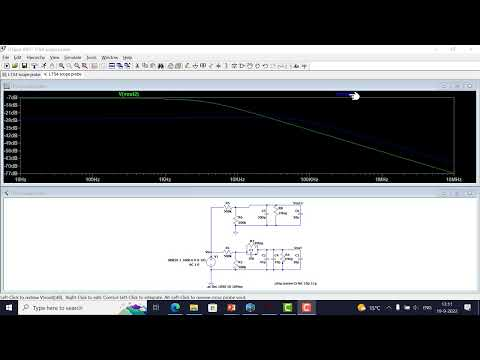

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('cuJTdYusAiE', width = 600, height = 450)


In [ ]:
from ipywidgets import FileUpload
from IPython.display import Image
import os
upload=FileUpload()
upload



In [ ]:
file_name="3B_2_Optimal_Cs.jpg"
if upload.value!={}:
    with open(file_name,"wb") as f:
        try: f.write(upload.data[-1]) # python 3.7 Kernel code, not working on Vocareum
        except: f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, works on Vocareum if you change the kernel

Image(filename=file_name, width="50%")

> __<font color='blue'>Hint:</font>__
Consider what the signal should look like. Which of the capacitor values results in the least distorted signal?

In [ ]:
### TO DO="your answer (discussion of the best value and why)"


Feel free to watch the following movie for a precap (quick intro) to the measurements.

In [ ]:
#precap
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Mmf_aafSutw', width = 600, height = 450)


## IMPLEMENT & INVESTIGATE : observe the influence of coax cables and probe on measurement 
> <font color='grey'>⏳ Estimated time: 40 min</font>

Build a voltage divider with R3 and R4 (=1 kOhm) of testboard 1. You should be able to do it on your own. If you need help, check 1C to see how the scheme of voltage divider should look and 3A to see how testboard 1 looks. 

We start by measuring with a coax cable connected.

* Use connector BNC1 on the test board to connect the function generator.
* Also, use a 2m **long** BNC-BNC cable to connect CH2 of the scope (via BNC2) to the output of the voltage divider.
* Use a BNC Tconnector to connect channel 1 (CH1) of the scope to the output of the generator.
* Set the generator to a **100 kHz, 8.0 Vpp sine wave with no offset**.
* Make sure that both oscilloscope channels are switched on and that both are set to **DC coupling**.
* Verify that the signals on the oscilloscope screen are as expected.

a) Increase the frequency in steps of 100 kHz up to 1 MHz (adjusting the time scale on the scope accordingly). Monitor the amplitude and phase of the output signal. Increase the frequency further, in steps of 1 MHz, up to 10 MHz, again monitoring the phase and amplitude of the output signal. Explain what you see. 

In [ ]:
### TO DO="How do the phase and amplitude change with frequency? Explain why this change happens"


b) The influence of the cable can also be shown in a different way. 
Set the generator to a __100 kHz__, 8V peak-to-peak __rectangular__ wave with a 50% duty cycle. Increase the frequency in steps of 100 kHz up to 1 MHz while monitoring the output signal. Explain what you see.

In [ ]:
### TO DO="Describe + Explain how the block wave shape changes with frequency"


c)	We will now measure with a scope probe. 

Set the generator to a __8 Vpp__, __3 MHz sine__ wave with no offset. Set the time base of the scope to 100 ns/div and set the vertical axes of both CH1 and CH2 to 1V/div. Disconnect the BNC cable from the input of CH2 of the scope.

**neither disconnect this cable from BNC2 on the test board, nor make any other changes to the test board!**

Connect a probe to CH2. Use it to measure the voltage across resistor R4. Change the vertical axis of CH2 to 100 mV/div. Why does the amplitude of the output signal appear to be a factor of 10 lower when using the probe?

> **<font color='blue'>__Hint__: </font>** probe is on the top shelf of your caddy and it looks like this <br>
<img src=https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/3B_scope_probe.jpg width=50%></img>

Notice:  that is has has a black part and grey part. When you push the grey attachment down, you will see a hook. When measuring with the probe, use the hook and the clip(black part) by hooking on the side of incoming current and clipping downstream. <br>
Example. If you want to measure over a resistor and current is coming from the right, you hook on the right arm of the resistor and clip on the left arm. Or, much more convenient, use the black/red wire to connect to each side of the resistor, and hook+clip onto the other side of the wire<br>
You always need to use the hook and the clip!!

In [ ]:
### TO DO="explain why the voltage measured by the probe is 10x lower than reality"


d) There is, in fact, a way to make the scope display the correct values on the vertical scale when using a probe. In the menu of CH2, set “Probe” to “10X” and verify that the scope now displays the correct voltages.

e) How does the measured voltage with the probe compare to the measured voltage with the coax cable for a 3MHz signal?
While monitoring the voltage across R4 via the probe, remove the BNC cable that was previously used for monitoring the output signal from connector BNC2 on the test board. Explain what happens.
> **<font color='blue'>__Hint__: </font>**
what happens to the capacitance parallel to R4, what is the RC time and -3dB cutoff frequency?

f) replace R4 by C4 (33nF). Measure the signal with the scope, and compare the outcome between measuring with probe and coax cable. 

In [ ]:
### TO DO=" Compare and explain the measurement with coax or probe on e) R4, f) C4 "

**testboard 1 will be used in 3C, so you can leave it at your table**

> <font color='red'>Optional challenge: Direclty observe the effect of probe (capacitor) compensation</font>

> Feel free to observe the influence of a wrongly adjusted scope probe, on the recorded square wave. For example:
> * measure a signal with higher frequency (for example 100 kHz)
> * use the screwdriver to gently turn the yellow knob on the scope probe, observe undershoot and overshoot. 
> * At the end, do set the capacitance back to optimal setting (observe a perfect block wave). 

## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 10 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 


**to be checked off by a TA:**

1. Explain when the probe should be used, and when the coax cable
    - At which frequency is beneficial to use the probe. (Hint: RC time!)
    - The optimal value for the compensation capacitor $C_S$ 
2. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
3. How do think this notebook could be improved

In [ ]:
#3B scope probe
### TO DO ="1. explain when to use a probe, when a coax cable"

### TO DO="2a. abstract"

### TO DO="2b. troubleshooting"

### TO DO="2c. code"

### TO DO="3. what changes would you suggest?"


In [ ]:
## LTSpice recording

from IPython.lib.display import YouTubeVideo
YouTubeVideo('ma689wtjbuA', width = 600, height = 450)

In [ ]:
## classroom equipment recording

from IPython.lib.display import YouTubeVideo
YouTubeVideo('cUM-jZKi-9M', width = 600, height = 450)